# Develop a program to implement Principal Component Analysis (PCA) for reducing the dimensionality of the Iris dataset from 4 features to 2.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading:

Load the Iris dataset which has 4 features:
- Sepal length
- Sepal width
- Petal length
- Petal width

In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

## Standardization:
- Scale the features to have mean=0 and variance=1
- This is crucial for PCA as it's sensitive to the scale of input features

In [4]:
# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## PCA Implementation:

- `n_components=2` reduces the dimensions from 4 to 2
- Creates new features (Principal Components) that are linear combinations of original features

In [5]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

## Results Visualization:
Creates a scatter plot where:
- X-axis is first principal component (PC1)
- Y-axis is second principal component (PC2)
- Colors represent different Iris species

In [6]:
# Create a DataFrame with the transformed data
pca_df = pd.DataFrame(
    data=X_pca,
    columns=['PC1', 'PC2']
)
pca_df['Target'] = y

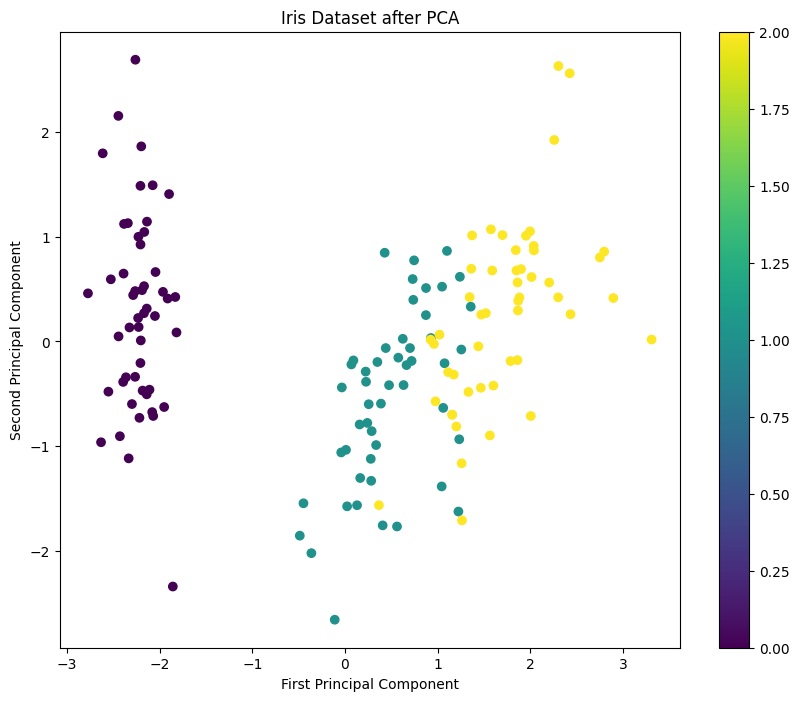

In [7]:
# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], 
                     pca_df['PC2'], 
                     c=y,
                     cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Iris Dataset after PCA')
plt.colorbar(scatter)

## Explained Variance Ratio:
- Shows how much of the original variance is preserved in each principal component
- Higher percentage means more information retained
- Usually, PC1 explains more variance than PC2

In [13]:
# Print explained variance ratio
print("\nExplained Variance Ratio:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"Total: {sum(pca.explained_variance_ratio_):.4f}")


Explained Variance Ratio:
PC1: 0.7296
PC2: 0.2285
Total: 0.9581


## Component Loadings:
- Shows how much each original feature contributes to the principal components
- Higher absolute values indicate stronger influence

In [9]:
# Show the component loadings
components_df = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=iris.feature_names
)
print("\nComponent Loadings:")
print(components_df)

plt.show()


Component Loadings:
                        PC1       PC2
sepal length (cm)  0.521066  0.377418
sepal width (cm)  -0.269347  0.923296
petal length (cm)  0.580413  0.024492
petal width (cm)   0.564857  0.066942


## Key Benefits of PCA:

- Reduces dimensionality while preserving important patterns
- Can help visualize high-dimensional data
- Removes correlations between features
- Can help reduce noise in the data